In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
housing = pd.read_csv('housing.csv')
housing = housing.drop('ocean_proximity', axis = 1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
print('Missing data:')
print(housing.isnull().sum(), end = '\n\n') 
print('Percentage of missing data:')
print(np.round(housing.isnull().mean(), decimals = 2))

Missing data:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Percentage of missing data:
longitude             0.00
latitude              0.00
housing_median_age    0.00
total_rooms           0.00
total_bedrooms        0.01
population            0.00
households            0.00
median_income         0.00
median_house_value    0.00
dtype: float64


In [8]:
housing[housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0


In [9]:
housing = housing.drop(housing[housing['total_bedrooms'].isnull()].index, axis = 0)

In [100]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


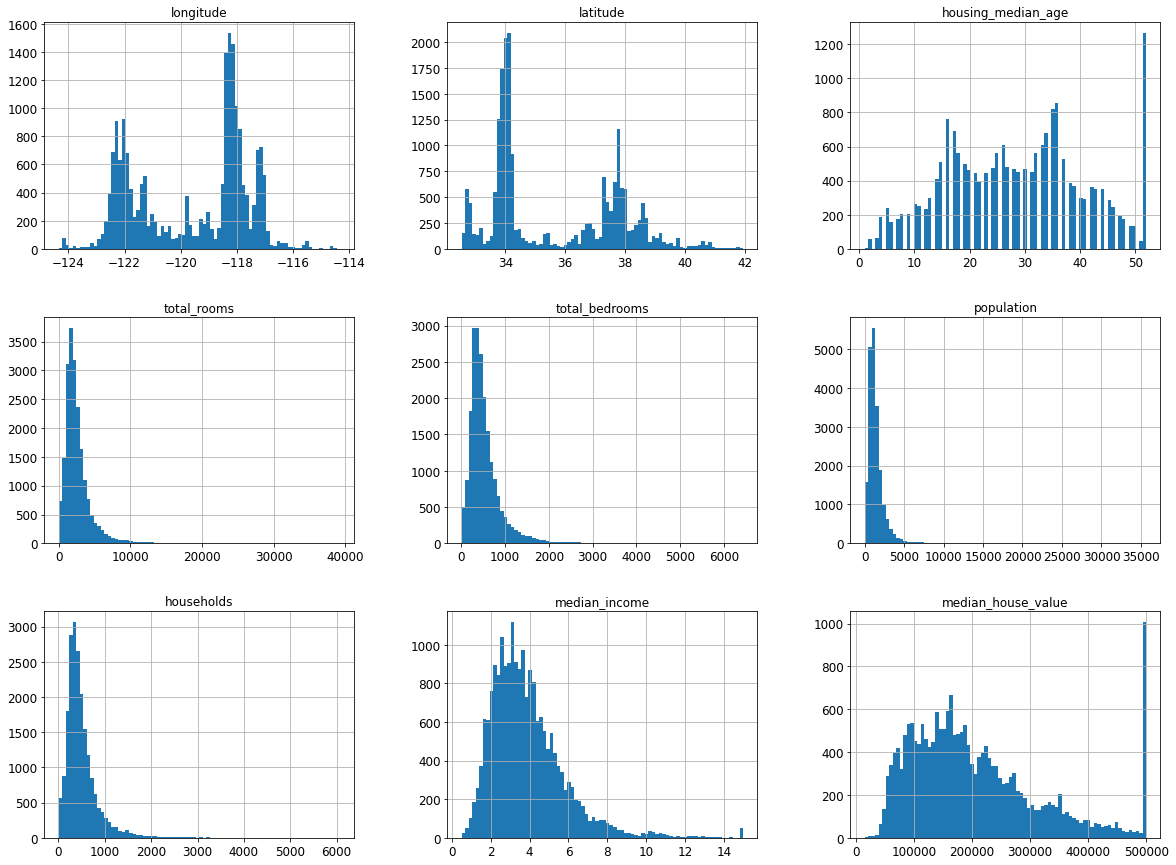

In [101]:
housing.hist(bins = 80, figsize = (20,15))
plt.show()

In [102]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [103]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [104]:
housing = housing.drop(['total_bedrooms', 'population', 'total_rooms', 'households'], axis = 1)
housing.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [105]:
X = housing.drop('median_house_value', axis = 1)
y = housing['median_house_value']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
housing_train = pd.concat([X_train, y_train], axis = 1)
housing_train.head()

,longitude,latitude,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
17727,-121.80,37.32,14.0,4.7027,4.951740,0.209429,3.028058,227600.0
2057,-119.63,36.64,33.0,3.4107,5.954023,0.174710,3.563218,110400.0
6453,-118.06,34.12,25.0,3.6639,5.126482,0.217939,2.434783,248100.0
4619,-118.31,34.07,28.0,2.2364,2.642058,0.401778,3.086130,305600.0
15266,-117.27,33.04,27.0,3.5500,4.551980,0.213159,3.222772,214600.0


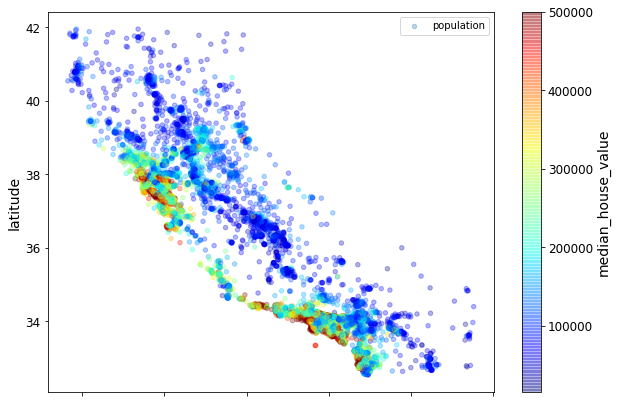

In [108]:
housing_train.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.3, c = 'median_house_value', 
            cmap = plt.get_cmap('jet'), colorbar = True, label = 'population', 
             figsize = (10,7))
plt.legend()
plt.show()

In [109]:
X_train = X_train.drop(['longitude', 'latitude'], axis = 1)

In [110]:
X_train.head()

,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household
17727,14.0,4.7027,4.951740,0.209429,3.028058
2057,33.0,3.4107,5.954023,0.174710,3.563218
6453,25.0,3.6639,5.126482,0.217939,2.434783
4619,28.0,2.2364,2.642058,0.401778,3.086130
15266,27.0,3.5500,4.551980,0.213159,3.222772


In [111]:
X_test = X_test.drop(['longitude', 'latitude'], axis = 1)

In [112]:
X_test.head()

,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household
14416,20.0,3.1838,3.783465,0.289282,2.066929
16383,2.0,4.4871,6.690700,0.174293,3.476489
7731,31.0,3.2237,4.657928,0.228625,2.887640
1410,30.0,2.8920,5.701357,0.219048,3.199095
1335,4.0,4.1016,4.709328,0.274988,2.013015


In [115]:
housing_train = pd.concat([X_train, y_train], axis = 1)
print(housing_train.head(), end = '\n\n')

housing_test = pd.concat([X_test, y_test], axis = 1)
print(housing_test.head(), end = '\n\n')

       housing_median_age  median_income  rooms_per_household  \
17727                14.0         4.7027             4.951740   
2057                 33.0         3.4107             5.954023   
6453                 25.0         3.6639             5.126482   
4619                 28.0         2.2364             2.642058   
15266                27.0         3.5500             4.551980   

       bedrooms_per_room  population_per_household  median_house_value  
17727           0.209429                  3.028058            227600.0  
2057            0.174710                  3.563218            110400.0  
6453            0.217939                  2.434783            248100.0  
4619            0.401778                  3.086130            305600.0  
15266           0.213159                  3.222772            214600.0  

       housing_median_age  median_income  rooms_per_household  \
14416                20.0         3.1838             3.783465   
16383                 2.0         4.4871

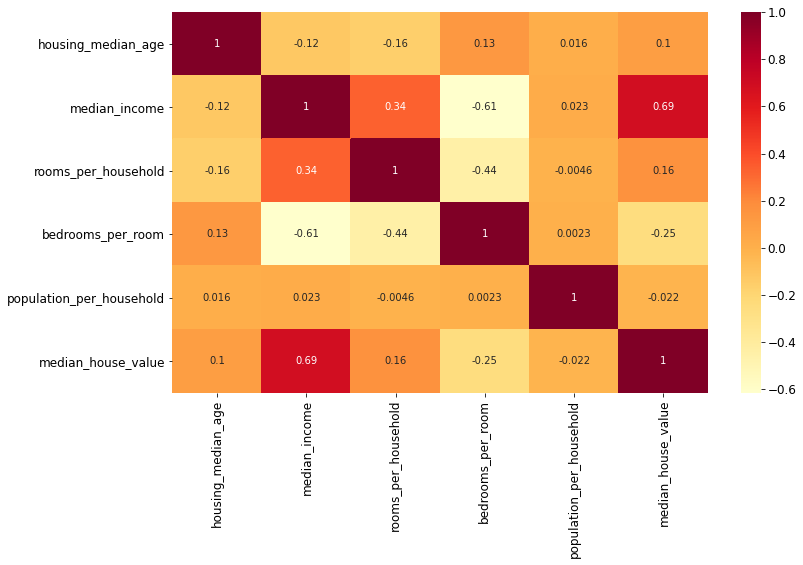

In [116]:
fig, ax = plt.subplots(figsize = (12,7))
sns.heatmap(housing_train.corr(), annot = True, cmap = plt.get_cmap('YlOrRd'), ax = ax);

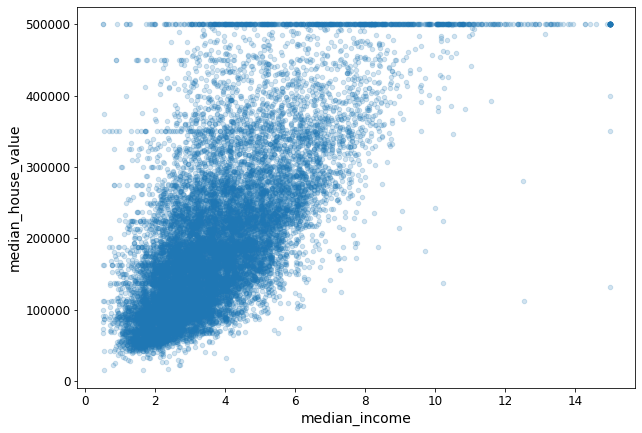

In [117]:
housing_train.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.2, figsize = (10,7));
# Price cap is clearly visible at $500,000.

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [158]:
from sklearn.metrics import mean_squared_error

lin_reg_RMSE = np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))
print('Root Mean Square Error:', lin_reg_RMSE)

Root Mean Square Error: 78914.88769695025


In [159]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [160]:
tree_reg_RMSE = np.sqrt(mean_squared_error(y_test, tree_reg.predict(X_test)))
print('Root Mean Square Error:', tree_reg_RMSE)

Root Mean Square Error: 91907.87202094497


In [161]:
from sklearn.model_selection import cross_validate

scores = cross_validate(tree_reg, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 10)
print(scores)

{'fit_time': array([0.11547112, 0.10937929, 0.12228012, 0.11243272, 0.10934758,
       0.10938334, 0.10933137, 0.10934806, 0.14217067, 0.10005593]), 'score_time': array([0.01559067, 0.        , 0.00199747, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00103188, 0.        ]), 'test_score': array([-8.18396905e+09, -7.93589234e+09, -9.12554384e+09, -8.68917653e+09,
       -8.05031761e+09, -7.90942989e+09, -8.61025356e+09, -8.39260011e+09,
       -9.06959161e+09, -7.88584558e+09])}


In [162]:
tree_rmse_scores = np.sqrt(-scores['test_score'])
print('Scores:',tree_rmse_scores)
print('Mean of scores:', np.mean(tree_rmse_scores))
print('Standard deviation of scores:', np.std(tree_rmse_scores))

Scores: [90465.29195897 89083.62552776 95527.71242374 93215.75257629
 89723.56219943 88934.97564457 92791.45199232 91611.13532131
 95234.40348375 88802.283652  ]
Mean of scores: 91539.01947801322
Standard deviation of scores: 2422.7929911592805


In [174]:
lin_scores = cross_validate(lin_reg, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 10)
print(lin_scores)

{'fit_time': array([0.00598764, 0.0039978 , 0.00498605, 0.00398874, 0.00501347,
       0.00501871, 0.00598025, 0.00498605, 0.0069499 , 0.02693129]), 'score_time': array([0.00099778, 0.00099111, 0.        , 0.        , 0.00096607,
       0.00100112, 0.00096607, 0.00099945, 0.00101018, 0.        ]), 'test_score': array([-5.66245641e+09, -5.22494732e+09, -5.77963877e+09, -6.03826243e+09,
       -5.97240448e+09, -5.62656146e+09, -6.45124037e+09, -6.34420220e+09,
       -6.10455560e+09, -6.20288690e+09])}


In [175]:
lin_rmse_scores = np.sqrt(-lin_scores['test_score'])
print('Scores:',lin_rmse_scores)
print('Mean of scores:', np.mean(lin_rmse_scores))
print('Standard deviation of scores:', np.std(lin_rmse_scores))

Scores: [75249.29508932 72283.79705227 76023.93548264 77706.25736071
 77281.33334717 75010.40903723 80319.61387194 79650.50031115
 78131.65558388 78758.40844898]
Mean of scores: 77041.52055852776
Standard deviation of scores: 2306.4486381821744


In [176]:
# Decision tree model is overfitting so badly that it is performing worse than Linear regression model.

In [177]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_reg_RMSE = np.sqrt(mean_squared_error(y_test, forest_reg.predict(X_test)))
print('Root Mean Square Error:', forest_reg_RMSE)

Root Mean Square Error: 66777.77637436755


In [180]:
forest_scores = cross_validate(forest_reg, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 10)
print(forest_scores)

{'fit_time': array([6.87597013, 6.79528213, 7.38327241, 7.24765348, 8.13456941,
       9.18444777, 8.5157361 , 7.91822195, 7.63987374, 6.8109386 ]), 'score_time': array([0.06252027, 0.06248951, 0.06245852, 0.06249022, 0.07779312,
       0.06719542, 0.07998514, 0.0492959 , 0.06245446, 0.06248617]), 'test_score': array([-4.21076541e+09, -4.06089806e+09, -4.38822435e+09, -4.67585633e+09,
       -4.25023048e+09, -4.03234243e+09, -4.40096264e+09, -4.53927761e+09,
       -4.15335636e+09, -4.37234236e+09])}


In [183]:
forest_rmse_scores = np.sqrt(-forest_scores['test_score'])
print(forest_rmse_scores)

print('Scores:',forest_rmse_scores)
print('Mean of scores:', np.mean(forest_rmse_scores))
print('Standard deviation of scores:', np.std(forest_rmse_scores))

[64890.41077987 63725.17603271 66243.67401125 68380.23350797
 65193.79176258 63500.72779408 66339.75158131 67374.16128441
 64446.53873816 66123.68988942]
Scores: [64890.41077987 63725.17603271 66243.67401125 68380.23350797
 65193.79176258 63500.72779408 66339.75158131 67374.16128441
 64446.53873816 66123.68988942]
Mean of scores: 65621.81553817456
Standard deviation of scores: 1484.226760266097


In [186]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2, 3, 4]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(X_train, y_train)

c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\users\takiy\appdata\local\programs\python\python38\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  Fil

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [187]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [197]:
for param, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
    print('Score:', np.sqrt(-score),'---->', 'Parameters:', param)

Score: 74546.76340607349 ----> Parameters: {'max_features': 2, 'n_estimators': 3}
Score: 67343.94898584909 ----> Parameters: {'max_features': 2, 'n_estimators': 10}
Score: 65168.46118914524 ----> Parameters: {'max_features': 2, 'n_estimators': 30}
Score: 74672.45584823894 ----> Parameters: {'max_features': 4, 'n_estimators': 3}
Score: 67540.0745181334 ----> Parameters: {'max_features': 4, 'n_estimators': 10}
Score: 65819.25139954731 ----> Parameters: {'max_features': 4, 'n_estimators': 30}
Score: nan ----> Parameters: {'max_features': 6, 'n_estimators': 3}
Score: nan ----> Parameters: {'max_features': 6, 'n_estimators': 10}
Score: nan ----> Parameters: {'max_features': 6, 'n_estimators': 30}
Score: nan ----> Parameters: {'max_features': 8, 'n_estimators': 3}
Score: nan ----> Parameters: {'max_features': 8, 'n_estimators': 10}
Score: nan ----> Parameters: {'max_features': 8, 'n_estimators': 30}
Score: 74295.87955291336 ----> Parameters: {'bootstrap': False, 'max_features': 2, 'n_estimat

In [198]:
y_pred = grid_search.predict(X_test)

In [199]:
print('RMSE for test set:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE for test set: 66275.74970804714
